In [1]:
## Dependencies
from data_tools import MFXDataAccessUtils
import fnmatch
import os
from dataset import Dataset

# Typing
from typing import List, Dict, Any
import numpy as np
from pprint import pprint

### Grab and load files

In [2]:
# Grab the paths to all the .npz files in the Data directory
files: List
files = MFXDataAccessUtils.grab_file_paths(root="../data", filetype=".npz")

# Filter the files into the different types of data
set_keys = ["DOPC_PL", "FLOW_PL", "DT", "TIRF", "DYE"]
data_raw = {
    key: {
        os.path.basename(filepath).split(".")[0]: filepath
        for filepath in fnmatch.filter(files, f"*raw*{key}*")
    }
    for key in set_keys
}
data_processed = {
    key: {
        os.path.basename(filepath).split(".")[0]: filepath
        for filepath in fnmatch.filter(files, f"*processed*{key}*")
    }
    for key in set_keys
}  # <- used in paper

# combine the data into a single dictionary
data_combined = {"raw": data_raw, "processed": data_processed}

# display the files
for key in set_keys:
    print(
        f"{key}: {len(data_raw[key])} raw files, {len(data_processed[key])} processed files"
    )
    for file in data_raw[key]:
        print(f"  {file}")
    for file in data_processed[key]:
        print(f"  {file}")

DOPC_PL: 3 raw files, 3 processed files
  DOPC_PL10_RAW
  DOPC_PL20_RAW
  DOPC_PL50_RAW
  DOPC_PL10
  DOPC_PL20
  DOPC_PL50
FLOW_PL: 3 raw files, 3 processed files
  DOPC_FLOW_PL10_RAW
  DOPC_FLOW_PL20_RAW
  DOPC_FLOW_PL50_RAW
  DOPC_FLOW_PL10
  DOPC_FLOW_PL20
  DOPC_FLOW_PL50
DT: 3 raw files, 3 processed files
  DOPC_DT100_RAW
  DOPC_DT200_RAW
  DOPC_DT50_RAW
  DOPC_DT100
  DOPC_DT200
  DOPC_DT50
TIRF: 1 raw files, 1 processed files
  DOPC_TIRF_RAW
  DOPC_GUV_TIRF
DYE: 1 raw files, 1 processed files
  DOPC_CHOL_DYE_RAW
  DOPC_CHOL_DYE


## The data notation explained
Each set is stored as npz files, which are compressed numpy arrays. 
The data is stored in a dictionary format, where the keys are the names of the data sets and the values are dictionaries containing the data. 

We provide the `Dataset` object to conveniently access the data.

In [3]:
## Select the dataset to use
dataset_key = data_combined["processed"]["DOPC_PL"]["DOPC_PL10"]  # <- this is one of the processed DOPC_PL dataset
print(f"Using dataset: {os.path.basename(dataset_key).split('.')[0]}")

## Load the dataset
dataset = Dataset.from_file(
    dataset_key, allow_pickle=True
)  # <- we need to allow pickle for the processed data

Using dataset: DOPC_PL10


## Export the full dataset to convenient formats

Using the `Dataset` object, you can format and export the data in a variety of formats.
The data is stored in a dictionary format, where the keys are the names of the data sets and the values are dictionaries containing the data.

### Dictionary

In [4]:
## Return the dataset dictionaries saved int he object

# data <- experimental data in array format
data: Dict[str, Any] = dataset.data

# metadata <- metadata for the dataset. only available for processed data
metadata: Dict[str, Any] = dataset.metadata

# results <- results of the analysis. only available for processed data
results: Dict[str, Any] = dataset.results

# Display the data
print(f"Data keys: {data.keys()}")
print(f"Metadata keys: {metadata.keys()}")
print(f"Results keys: {results.keys()}")

Data keys: dict_keys(['Z', 'Y', 'X', 'T', 'ECO', 'EFO', 'TID', 'TIC', 'ITR', 'ID'])
Metadata keys: dict_keys(['setKey', 'n_tracks', 'n_tracks_post_split', 'mfx_parameters', 'suggested_max_fit_cycles', 'suggested_cycle_shift', 'smallest_delay', 'initial_cycle', 'cycle_time', 'time_grid', 'timeline', 'BBEG_post_split_weights', 'photon_stats_pre_split', 'photon_stats_post_split', 'cycle_stats_pre_split', 'cycle_stats_post_split', 'split_thresholds'])
Results keys: dict_keys(['unrestricted_ensemble_fit_res', 'restricted_ensemble_fit_res', 'unrestricted_time_fit_res', 'restricted_time_fit_res', 'unrestricted_ergodicity', 'restricted_ergodicity'])


### Pandas DataFrame

In [5]:
## Export the dataset as dataframe
dataset.to_dataframe()

,Z,Y,X,T,ECO,EFO,TID,TIC,ITR,ID
0,0.0,0.000006,-0.000001,0.000000,11.0,55055.055055,191.0,9.709682e+07,2.0,0
1,0.0,0.000006,-0.000001,0.000280,16.0,80080.080080,191.0,9.710800e+07,2.0,0
2,0.0,0.000006,-0.000001,0.000559,14.0,70070.070070,191.0,9.711919e+07,2.0,0
3,0.0,0.000006,-0.000001,0.000839,24.0,120120.120120,191.0,9.713038e+07,2.0,0
4,0.0,0.000006,-0.000001,0.001119,24.0,120120.120120,191.0,9.714157e+07,2.0,0
...,...,...,...,...,...,...,...,...,...,...
270060,0.0,0.000006,-0.000001,0.040142,10.0,100100.100100,24693.0,1.202929e+10,2.0,1060
270061,0.0,0.000006,-0.000001,0.040290,19.0,95095.095095,24693.0,1.202930e+10,2.0,1060
270062,0.0,0.000006,-0.000001,0.040570,17.0,85085.085085,24693.0,1.202931e+10,2.0,1060
270063,0.0,0.000006,-0.000001,0.040849,10.0,100100.100100,24693.0,1.202932e+10,2.0,1060


### Matrix Format

In [6]:
## Export to matrix without labels
print("Exporting to matrix without labels...")
pprint(dataset.to_matrix())
print()

## Export to matrix with labels. This will return a tuple of the matrix and the labels
print("Exporting to matrix with labels...")
pprint(dataset.to_matrix_with_labels())

Exporting to matrix without labels...
array([[ 0.00000000e+00,  5.56097346e-06, -1.17250509e-06, ...,
         9.70968150e+07,  2.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  5.59341433e-06, -1.21853065e-06, ...,
         9.71080040e+07,  2.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  5.60404778e-06, -1.24927533e-06, ...,
         9.71191930e+07,  2.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  5.95152379e-06, -1.20182483e-06, ...,
         1.20293072e+10,  2.00000000e+00,  1.06000000e+03],
       [ 0.00000000e+00,  5.97619583e-06, -1.22750570e-06, ...,
         1.20293184e+10,  2.00000000e+00,  1.06000000e+03],
       [ 0.00000000e+00,  6.02419151e-06, -1.21367365e-06, ...,
         1.20293243e+10,  2.00000000e+00,  1.06000000e+03]])

Exporting to matrix with labels...
(array([[ 0.00000000e+00,  5.56097346e-06, -1.17250509e-06, ...,
         9.70968150e+07,  2.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  5.59341433e-06, -1

## Sort and export particle trajectories
The `Dataset` object also provides a convenient a few ways to sort and export particle trajectories.

### Export to dictionary

In [7]:
## Sort and return the data as dictionairy of dictionaries containing the trajectory data
track_dict: Dict[np.uint16, Dict[str, np.ndarray]] = dataset.get_tracks_as_dictionary()

# show some informatiom about the data
print(f"Number of tracks: {len(track_dict)}")
print("Track dictionary keys:")
print(track_dict[0].keys())

Number of tracks: 1061
Track dictionary keys:
dict_keys(['Y', 'X', 'T', 'ECO', 'EFO'])


### Export to matrix format

In [8]:
## Sort and return the data as a dictionary of particle trajecories
track_matrices: Dict[np.uint16, np.ndarray] = dataset.get_tracks_as_matrices()

# show some informatiom about the data
print(f"Number of tracks: {len(track_dict)}")
print("Shape of first track matrix:")
print(track_matrices[0].shape)

Number of tracks: 1061
Shape of first track matrix:
(181, 9)


## Simple plotting utilities
The `Dataset` object also provides a few simple plotting utilities to visualize the data.

### Plot an overview of the dataset

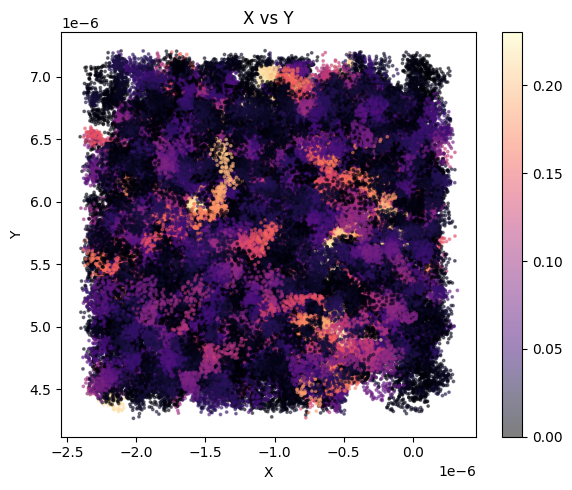

In [9]:
## Whole dataset

x: str = "X"  # <- change this to display different data on the x-axis
y: str = "Y"  # <- change this to display different data on the y-axis
hue: str = "T"  # <- change this to display different data as the hue

fig, ax = dataset.overview_2d(x=x, y=y, hue=hue)

### Plot a single trajectory

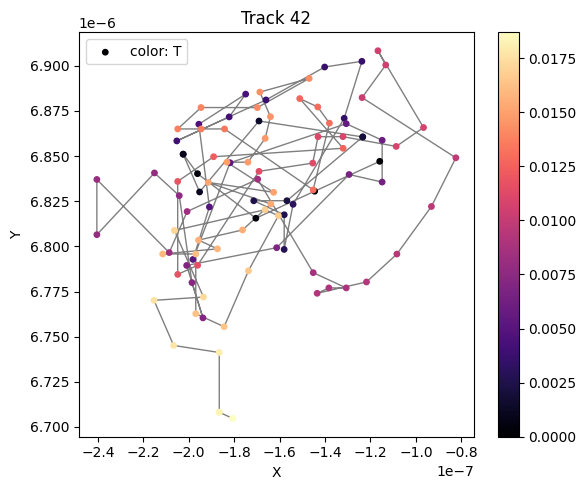

In [10]:
## plot a single track
trajectory_ID: int = 42  # <- change this to display different tracks

x: str = "X"  # <- change this to display different data on the x-axis
y: str = "Y"  # <- change this to display different data on the y-axis
hue: str = "T"  # <- change this to display different data as the hue

fig, ax = dataset.show_track(ID=trajectory_ID, x=x, y=y, hue=hue)

## Access the results
The `Dataset` object also provides a convenient way to access the results of the analysis.

In [13]:
## Get results
results:Dict[str, Any] = dataset.get_results()

## Condense the results to the time and ensemble average
condensed_results:Dict[str, Any] = dataset.condensed_results()

## Get the ergodicity values
ergodicity:Dict[str, Any] = dataset.get_ergodicity()

## compile the condensend results into a dataframe
dataset.get_condensed_result_as_dataframe()

,D,sig2,varD,varsig2,numPoints_slope,numPoints_intercept,stdD,stdsig2,sig,stdsig,varsig
unrestricted_time_average,1.760004e-12,4.328369e-16,9.573295e-26,2.376264e-32,5.0,5.0,2.622805e-13,1.275059e-16,1.881562e-08,1.124005e-08,1.426754e-16
restricted_time_average,7.795210e-13,7.746649e-16,4.359255e-26,8.122871e-32,8.0,8.0,1.130616e-13,1.779599e-16,2.665146e-08,1.153616e-08,1.535300e-16
unrestricted_ensemble_average,2.476709e-12,3.079039e-16,1.236719e-25,2.827279e-32,"[5, 4, 4]","[5, 5, 5]",3.516701e-13,1.681451e-16,1.754719e-08,1.296708e-08,1.681451e-16
restricted_ensemble_average,6.330270e-13,7.817491e-16,5.629833e-28,1.490445e-33,"[5, 8, 8]","[5, 8, 8]",2.372727e-14,3.860628e-17,2.795978e-08,6.213395e-09,3.860628e-17


## Access the Metadata
The `Dataset` object also provides a convenient way to access the metadata of the dataset.

In [12]:
## Get metadata
metadata: Dict[str, Any] = dataset.get_metadata()

## Show metadata
dataset.show_metadata()

Metadata:
{'BBEG_post_split_weights': {'CV_AREA': 1,
                             'CV_DENSITY': 2,
                             'ELLI': 1,
                             'MAX_DIST': 1,
                             'SPHE': 2},
 'cycle_stats_post_split': {'B_max': np.int64(2),
                            'B_median': np.int64(1),
                            'B_min': np.int64(1),
                            'B_std': np.float64(0.2645556463981513),
                            'D_max': np.int64(2),
                            'D_median': np.int64(0),
                            'D_min': np.int64(0),
                            'D_std': np.float64(0.12588619423611797),
                            'TOT_max': np.int64(3),
                            'TOT_median': np.int64(1),
                            'TOT_min': np.int64(1),
                            'TOT_std': np.float64(0.3187261433898586)},
 'cycle_stats_pre_split': {'B_max': np.int64(2),
                           'B_median': np.int64(1),